In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import missingno as msn

In [111]:
order = pd.read_csv("sys_order.csv",encoding="utf-8")
zhima = pd.read_csv("zhima_info.csv",encoding="utf-8")
data = pd.merge(order,zhima,how="inner",left_on="id",right_on="order_id")
print(data.shape)
data.head()

(1730403, 26)


,user_id,id,age,gender,marriage,education,shebao,vehicle_num,town,income_range,...,channel,client_type,cv,liabilities,punishment,other_loan,loan_usage,label,order_id,zhima_score
0,1000003772,1000003781,29,Male,已婚已育,高中及以下,1,0,1,5000-8000,...,oppo|oppo,0,other,1,1,1,NaN,0,1000003781,617
1,1000003773,1000003782,27,Male,已婚已育,高中及以下,1,0,1,5000-8000,...,appstore|appstore,0,other,1,1,1,NaN,0,1000003782,706
2,1000003774,1000003783,20,Male,未婚,高中及以下,1,0,1,3000-5000,...,pro版|pro,1,other,1,1,1,NaN,0,1000003783,613
3,1000003775,1000003784,30,Male,已婚已育,本科,1,0,1,8000-12000,...,appstore|appstore,1,other,1,1,1,NaN,0,1000003784,722
4,1000003776,1000003785,22,Male,未婚,高中及以下,1,0,1,3000-5000,...,vivo|vivo,0,other,1,1,1,NaN,0,1000003785,565


In [112]:
data = data.drop(["user_id","order_id"],axis=1)
data.head(1)

,id,age,gender,marriage,education,shebao,vehicle_num,town,income_range,loan_amount,...,house_nature,channel,client_type,cv,liabilities,punishment,other_loan,loan_usage,label,zhima_score
0,1000003781,29,Male,已婚已育,高中及以下,1,0,1,5000-8000,1000.0,...,与父母同住,oppo|oppo,0,other,1,1,1,NaN,0,617


In [113]:
df = pd.read_csv("user_id.csv",encoding="utf-8")
print(df.shape)
df.head(2)

(978475, 2)


,user_id,id
0,1000000001,1000059871
1,1000000006,1000270687


In [114]:
df = df.drop("user_id",axis=1)

In [115]:
data = pd.merge(df,data,how="inner",on="id")
print(data.shape)
data.head()

(978471, 24)


,id,age,gender,marriage,education,shebao,vehicle_num,town,income_range,loan_amount,...,house_nature,channel,client_type,cv,liabilities,punishment,other_loan,loan_usage,label,zhima_score
0,1000059871,33,Male,未婚,本科,1,0,1,8000-12000,0.0,...,自有,appstore|appstore,1,other,1,1,1,NaN,0,781
1,1000270687,24,Female,未婚,硕士及以上,0,0,1,3000以下,700.0,...,租赁,华为|huawei,2,other,1,1,1,NaN,0,705
2,1000271021,40,Male,已婚未育,本科,1,0,1,8000-12000,1000.0,...,自有,百度|baidu,2,other,1,1,1,NaN,0,798
3,1000122055,35,Male,已婚已育,大专,1,0,1,8000-12000,500.0,...,自有,好口子|haokouzi7,2,other,1,1,1,NaN,0,676
4,1000033468,24,Female,未婚,本科,0,0,1,3000-5000,500.0,...,租赁,appstore|appstore,2,other,1,1,1,NaN,0,753


In [116]:
#缺失值统计
data.isnull().sum(axis=0).sort_values(ascending=False)*100/len(data)

loan_usage      100.000000
seniority        26.210997
income_range     26.210997
channel           0.018396
house_nature      0.002146
education         0.000102
zhima_score       0.000000
loan_amount       0.000000
age               0.000000
gender            0.000000
marriage          0.000000
shebao            0.000000
vehicle_num       0.000000
town              0.000000
loan_rate         0.000000
loan_term         0.000000
label             0.000000
occupation        0.000000
client_type       0.000000
cv                0.000000
liabilities       0.000000
punishment        0.000000
other_loan        0.000000
id                0.000000
dtype: float64

In [117]:
#删除缺失值占比大于20%
data = data.dropna(thresh=len(data)*0.2,axis=1)
data.isnull().sum(axis=0).sort_values(ascending=False)*100/len(data)

seniority       26.210997
income_range    26.210997
channel          0.018396
house_nature     0.002146
education        0.000102
zhima_score      0.000000
loan_amount      0.000000
age              0.000000
gender           0.000000
marriage         0.000000
shebao           0.000000
vehicle_num      0.000000
town             0.000000
loan_rate        0.000000
loan_term        0.000000
label            0.000000
occupation       0.000000
client_type      0.000000
cv               0.000000
liabilities      0.000000
punishment       0.000000
other_loan       0.000000
id               0.000000
dtype: float64

In [118]:
#筛选非单一特征的数据集
data = data.loc[:,data.apply(pd.Series.nunique) !=1]
data.shape

(978471, 19)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978471 entries, 0 to 978470
Data columns (total 19 columns):
id              978471 non-null int64
age             978471 non-null int64
gender          978471 non-null object
marriage        978471 non-null object
education       978470 non-null object
shebao          978471 non-null int64
vehicle_num     978471 non-null int64
income_range    722004 non-null object
loan_amount     978471 non-null float64
loan_term       978471 non-null int64
loan_rate       978471 non-null int64
occupation      978471 non-null object
seniority       722004 non-null object
house_nature    978450 non-null object
channel         978291 non-null object
client_type     978471 non-null int64
cv              978471 non-null object
label           978471 non-null int64
zhima_score     978471 non-null int64
dtypes: float64(1), int64(9), object(9)
memory usage: 149.3+ MB


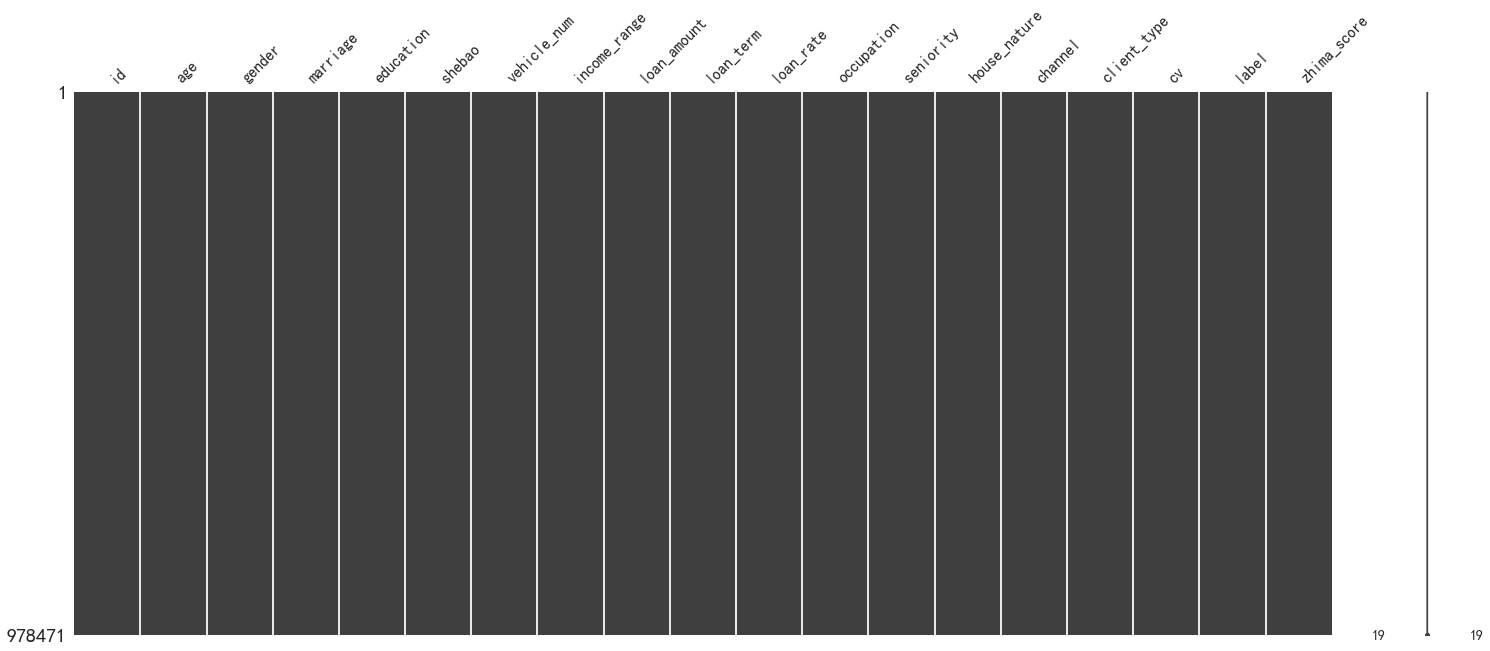

In [121]:
#缺失值处理
data = data.fillna("unknown")
msn.matrix(data)

In [105]:
#变量分布图
def var_countplot(x):
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    sns.set_style("dark",{"font.sans-serif":["simhei","Arial"]})
    sns.countplot(x=x,data=data,ax=axs[0])
    axs[0].set_title(x)
    data[x].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
    axs[1].set_title(x)

In [122]:
data.columns

Index(['id', 'age', 'gender', 'marriage', 'education', 'shebao', 'vehicle_num',
       'income_range', 'loan_amount', 'loan_term', 'loan_rate', 'occupation',
       'seniority', 'house_nature', 'channel', 'client_type', 'cv', 'label',
       'zhima_score'],
      dtype='object')

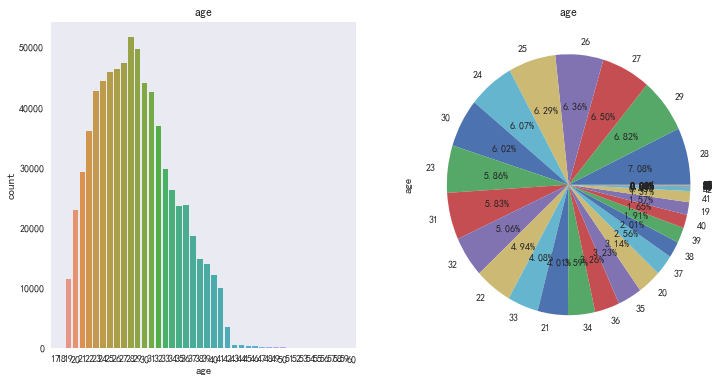

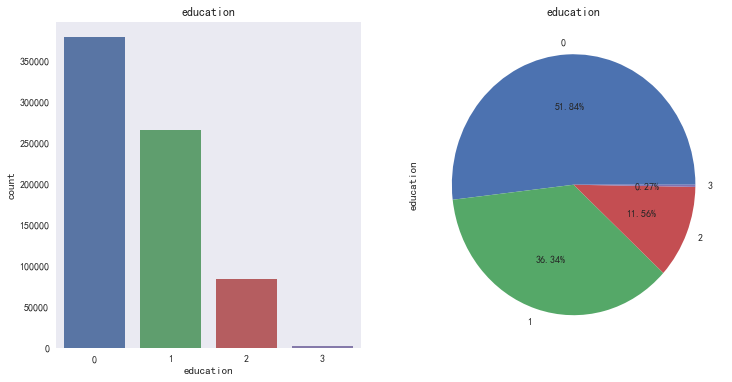

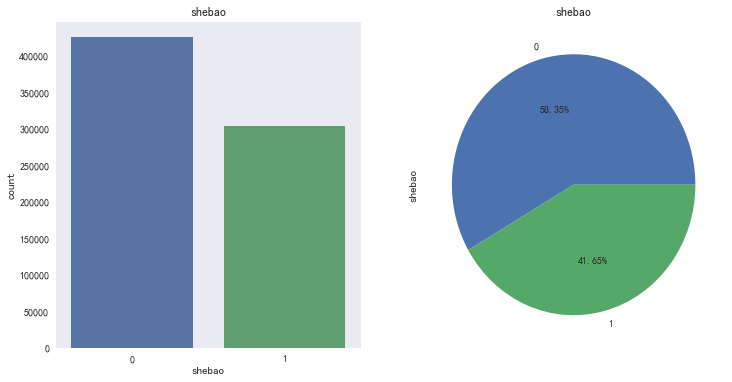

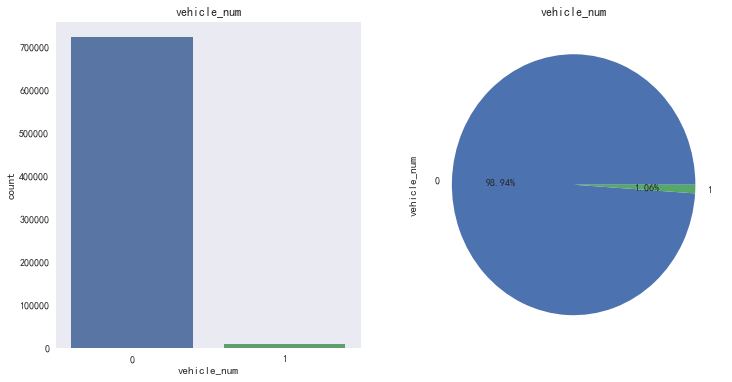

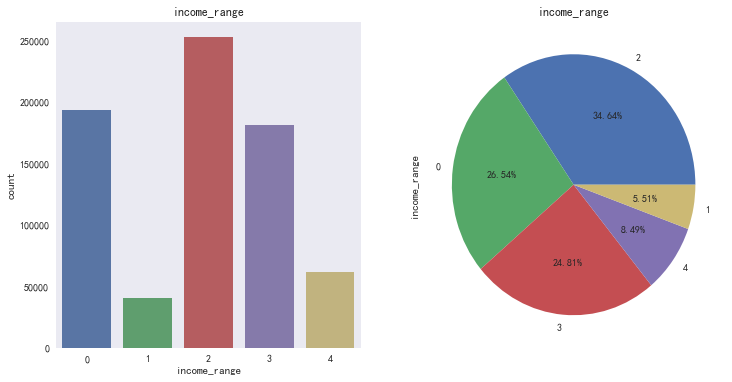

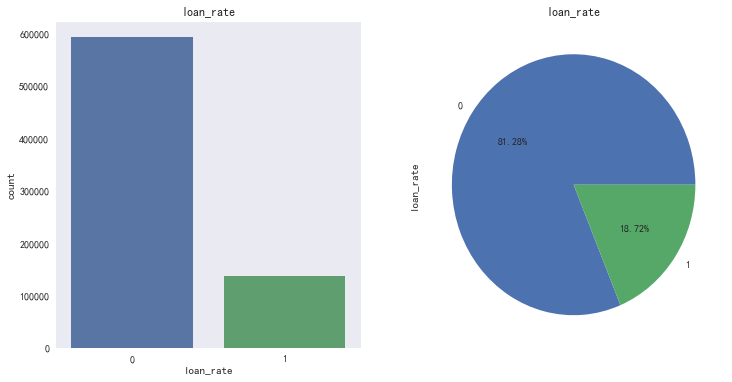

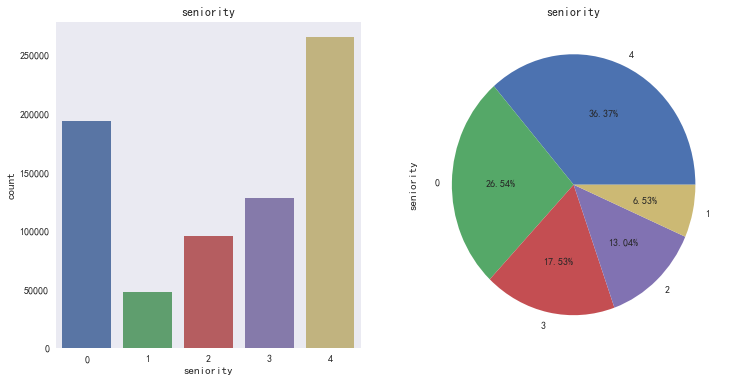

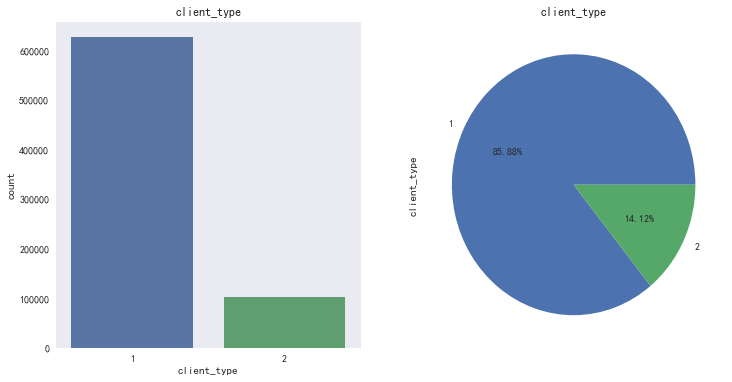

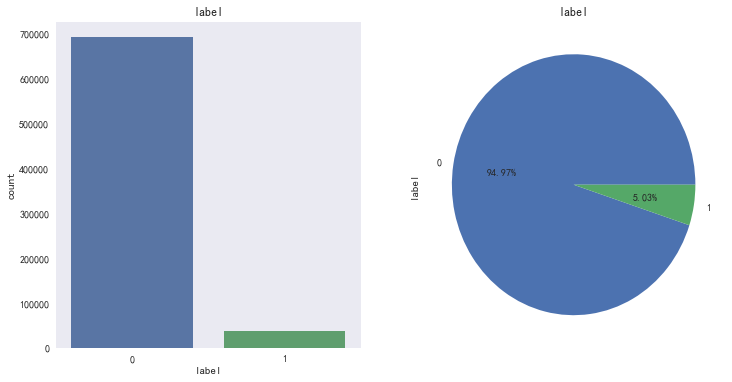

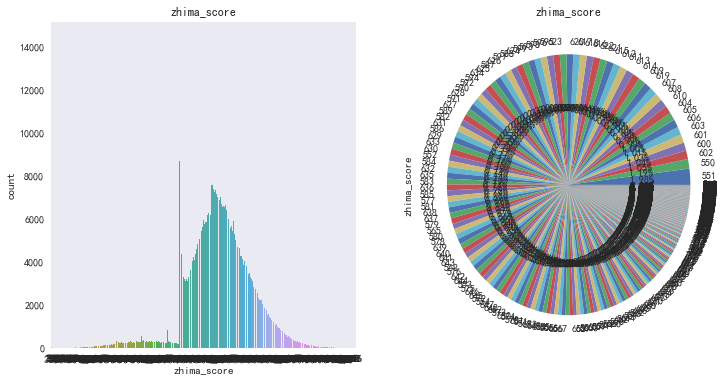

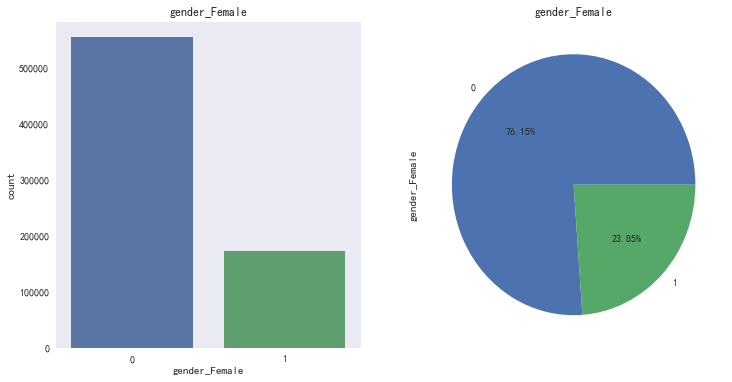

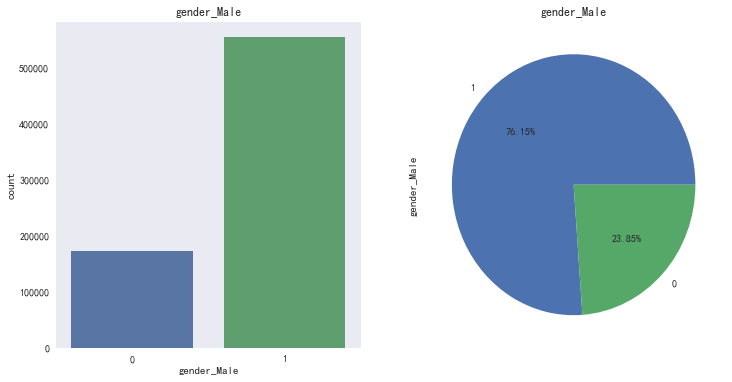

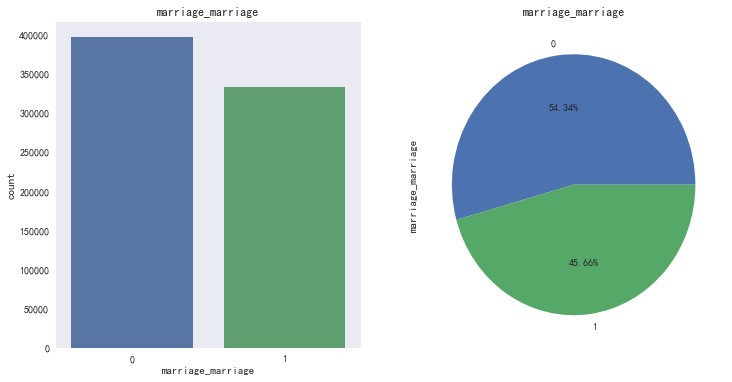

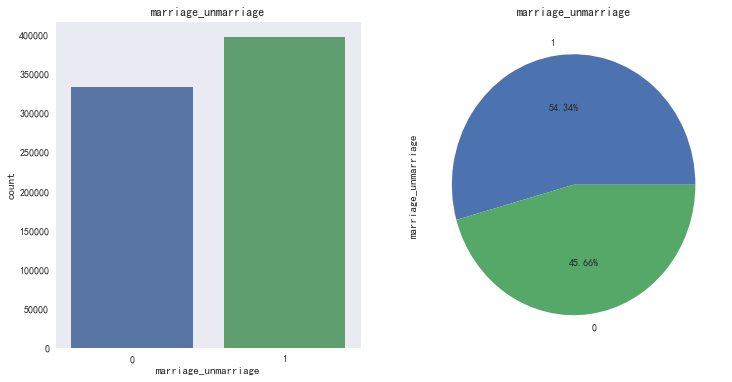

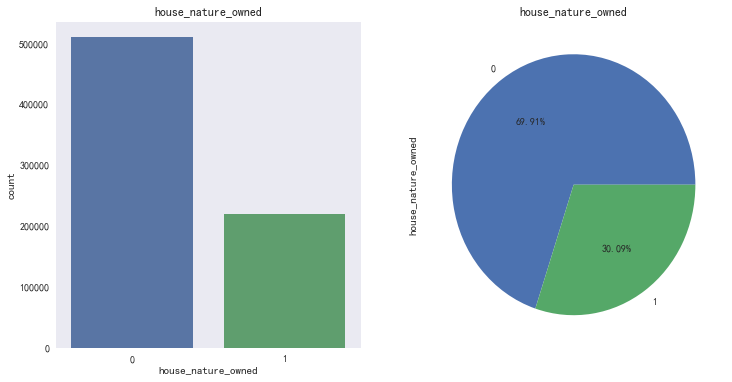

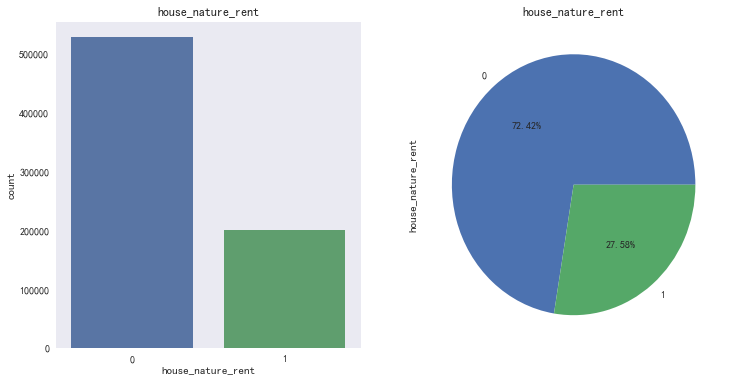

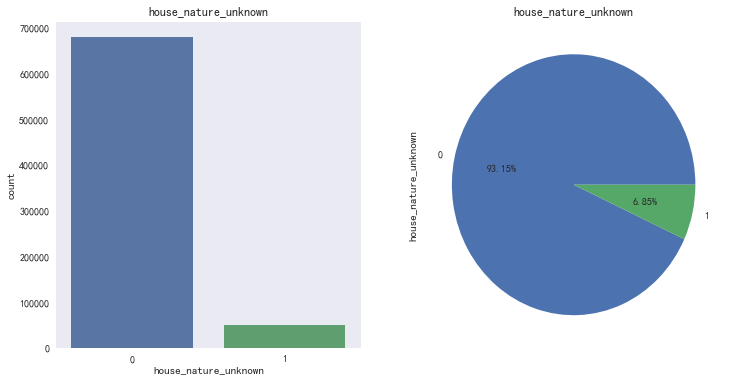

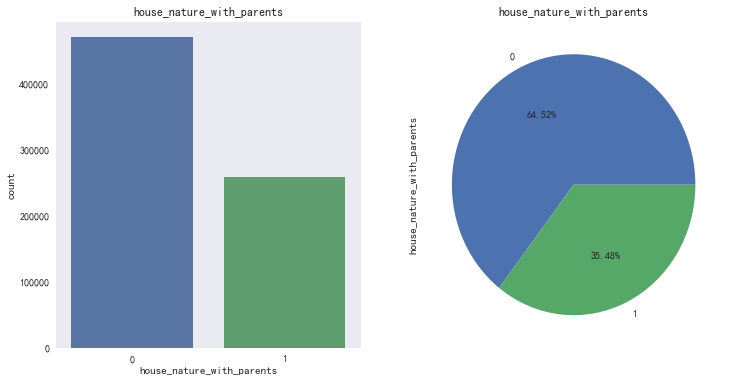

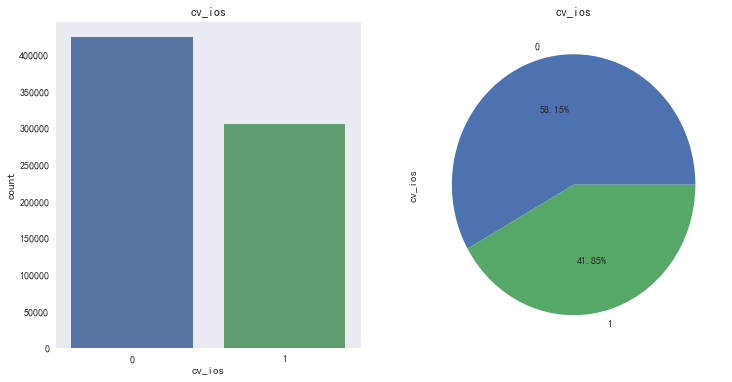

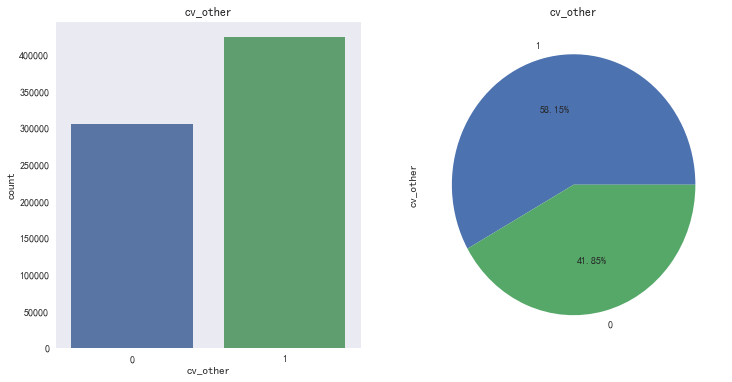

In [153]:
for i in data.columns:
    var_countplot(i)

In [124]:
data = data.drop([ 'loan_amount', 'loan_term'],axis=1)

In [125]:
#变量处理
data["client_type"] = data["client_type"].replace(0,1)

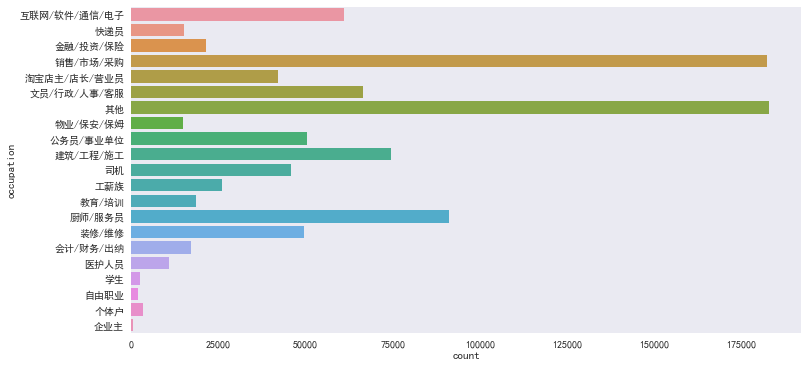

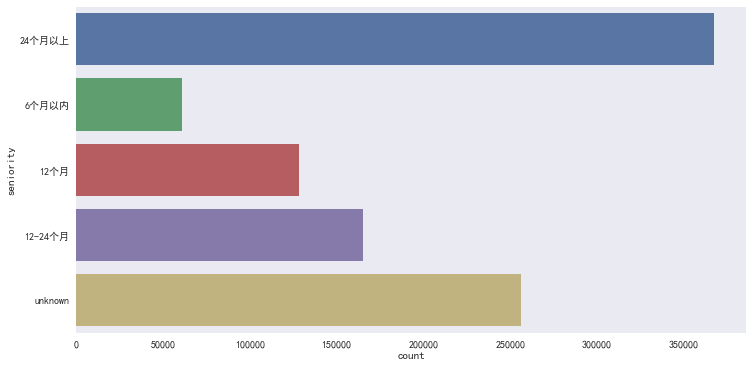

In [126]:
#职业, 渠道,终端分布
for i in ['occupation','seniority']:
    plt.figure(figsize=(12,6))
    sns.countplot(y=i,data=data)

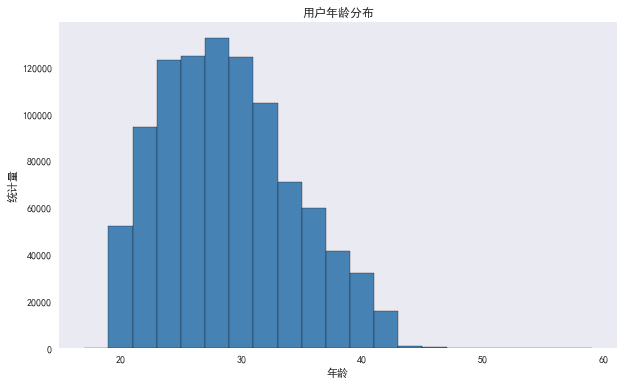

In [127]:
#年龄
plt.figure(figsize=(10,6))
plt.hist(data.age, # 绘图数据
        bins = np.arange(data.age.min(),data.age.max(),2), # 指定直方图的组距
        normed = False, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

plt.title('用户年龄分布')
plt.xlabel('年龄')
plt.ylabel('统计量')

In [130]:
data = data[data.zhima_score>0]

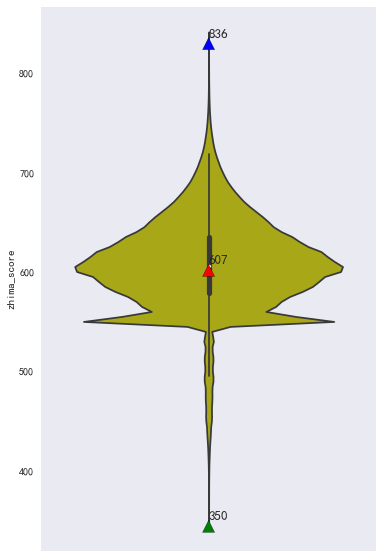

In [131]:
#芝麻信用分
plt.figure(num=1, figsize=(6, 10))#画布大小
df = data.zhima_score
plt.annotate(df.max(), xy=(0, df.max()), xytext=(0,df.max()), fontsize=13, arrowprops=dict(facecolor="b", shrink=1),) 
plt.annotate(int(df.mean()), xy=(0, df.mean()), xytext=(0,df.mean()), fontsize=13, arrowprops=dict(facecolor="r", shrink=1),)
plt.annotate(df.min(), xy=(0, df.min()), xytext=(0,df.min()), fontsize=13, arrowprops=dict(facecolor="g", shrink=1),)
#作图
ax=sns.violinplot(y="zhima_score",data=data,ci=0.95,color="y")

In [132]:
#特征类型转换
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978101 entries, 0 to 978470
Data columns (total 17 columns):
id              978101 non-null int64
age             978101 non-null int64
gender          978101 non-null object
marriage        978101 non-null object
education       978101 non-null object
shebao          978101 non-null int64
vehicle_num     978101 non-null int64
income_range    978101 non-null object
loan_rate       978101 non-null int64
occupation      978101 non-null object
seniority       978101 non-null object
house_nature    978101 non-null object
channel         978101 non-null object
client_type     978101 non-null int64
cv              978101 non-null object
label           978101 non-null int64
zhima_score     978101 non-null int64
dtypes: int64(8), object(9)
memory usage: 134.3+ MB


In [147]:
for i in data.select_dtypes(include=["object"]).columns:
    print(data[i].value_counts())

Male      554826
Female    173777
Name: gender, dtype: int64
unmarriage    395930
marriage      332673
Name: marriage, dtype: int64
with_parents    258503
owned           219244
rent            200946
unknown          49910
Name: house_nature, dtype: int64
other    423704
ios      304899
Name: cv, dtype: int64


In [134]:
drop_col = ["channel","occupation"]
data = data.drop(drop_col,axis=1)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978101 entries, 0 to 978470
Data columns (total 15 columns):
id              978101 non-null int64
age             978101 non-null int64
gender          978101 non-null object
marriage        978101 non-null object
education       978101 non-null object
shebao          978101 non-null int64
vehicle_num     978101 non-null int64
income_range    978101 non-null object
loan_rate       978101 non-null int64
seniority       978101 non-null object
house_nature    978101 non-null object
client_type     978101 non-null int64
cv              978101 non-null object
label           978101 non-null int64
zhima_score     978101 non-null int64
dtypes: int64(8), object(7)
memory usage: 119.4+ MB


In [137]:
data.to_csv("data.csv",index=False,encoding="utf-8")

In [141]:
data = pd.read_csv('data.csv',encoding="utf-8")

In [143]:
data = data.drop("id",axis=1)

In [144]:
#有序特征转换
map_dict = {
    "education":{
        "unknown":0,
        "中专/高中及以下":0,
       "高中及以下":0,
        "大专":1,
        "本科":2,
        "硕士及以上":3
    },
    "income_range":{
      "unknown":0,
     "3000以下":1,
     "3000-5000" :2,
     "5000-8000":3,
     "8000-12000":4
    },
    "seniority":{
        "unknown":0,
        "6个月以内":1,
        "12个月":2,
        "12-24个月":3,
        "24个月以上":4
    }
}

data = data.replace(map_dict)

In [145]:
#特征收缩
dict_map ={
    "marriage":{
        "未婚":"unmarriage",
        "已婚已育":"marriage",
        "已婚未育":"marriage",
        "离异":"unmarriage",
        "已婚，有子女":"marriage",
        "已婚，无子女":"marriage",
        "其他":"unmarriage",
        "丧偶":"marriage",
        "复婚":"marriage"
    },
    "house_nature":{
        "与父母同住":"with_parents",
        "自有":"owned",
        "租赁":"rent",
        "其他":"unknown",
        "有住房，无贷款":"owned",
        "与父母/配偶同住":"with_parents",
        "租房居住":"rent",
        "有住房，有贷款":"owned",
        "单位宿舍/用房":"rent",
        "自建房":"with_parents"
    }
}

data = data.replace(dict_map)

In [146]:
#去掉重复行
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(978101, 14)
(728603, 14)


In [148]:
#无序特征编码
n_columns = data.select_dtypes(include=["object"]).columns
dummy_df = pd.get_dummies(data[n_columns])
data =pd.concat([data,dummy_df],axis=1)

#删除原来的变量
data = data.drop(n_columns,axis=1)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728603 entries, 0 to 978100
Data columns (total 20 columns):
age                          728603 non-null int64
education                    728603 non-null int64
shebao                       728603 non-null int64
vehicle_num                  728603 non-null int64
income_range                 728603 non-null int64
loan_rate                    728603 non-null int64
seniority                    728603 non-null int64
client_type                  728603 non-null int64
label                        728603 non-null int64
zhima_score                  728603 non-null int64
gender_Female                728603 non-null uint8
gender_Male                  728603 non-null uint8
marriage_marriage            728603 non-null uint8
marriage_unmarriage          728603 non-null uint8
house_nature_owned           728603 non-null uint8
house_nature_rent            728603 non-null uint8
house_nature_unknown         728603 non-null uint8
house_nature_with_pare

In [150]:
data.to_csv("data_new.csv",index=False,encoding="utf-8")
#data = pd.read_csv("data_last.csv",encoding="utf-8")